In [ ]:
# mongoimport --type csv -d ASX_Stock_Database -c ASX_Stock --headerline --drop stock_info_results_cleaned.csv

In [82]:
# Import dependencies
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import os

In [66]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [67]:
# assign the uk_food database to a variable name
db = mongo['ASX_Stock_Database']

In [68]:
# review the collections in our database
print(db.list_collection_names())

['ASX_Stock']


In [69]:
# assign the collection to a variable
ASX_Stock = db['ASX_Stock']

In [70]:
sort = [('Market Cap', -1)]

limit = 20

Top_20_ASX_Stock = list(ASX_Stock.find().sort(sort).limit(limit))

pprint(Top_20_ASX_Stock)

[{'ASX Code': 'BHP.AX',
  'Earning Per Share': 2.23,
  'Employee Number': 49089.0,
  'Industry': 'Other Industrial Metals & Mining',
  'Market Cap': 228556832768.0,
  'Name': 'BHP Group Limited',
  'P/E Ratio': 20.237669,
  'Price': 45.13,
  'Return On Equity': 0.19326,
  'Sector': 'Basic Materials',
  'Total Revenue': 55656001536.0,
  'Volume': 7699498.0,
  '_id': ObjectId('660bc287782dcbcc22958ba4')},
 {'ASX Code': 'CBA.AX',
  'Earning Per Share': 5.75,
  'Employee Number': 48930.0,
  'Industry': 'Banks—Diversified',
  'Market Cap': 200903524352.0,
  'Name': 'Commonwealth Bank of Australia',
  'P/E Ratio': 20.881739,
  'Price': 120.07,
  'Return On Equity': 0.13457,
  'Sector': 'Financial Services',
  'Total Revenue': 26127998976.0,
  'Volume': 2130119.0,
  '_id': ObjectId('660bc287782dcbcc22958bfe')},
 {'ASX Code': 'RIO.AX',
  'Earning Per Share': 9.42,
  'Employee Number': 57000.0,
  'Industry': 'Other Industrial Metals & Mining',
  'Market Cap': 198921879552.0,
  'Name': 'Rio Tint

In [71]:
Top_20_ASX_Stock_df = pd.DataFrame(Top_20_ASX_Stock)
Top_20_ASX_Stock_df


,_id,ASX Code,Name,Industry,Sector,Market Cap,Employee Number,Total Revenue,Price,Volume,P/E Ratio,Earning Per Share,Return On Equity
0,660bc287782dcbcc22958ba4,BHP.AX,BHP Group Limited,Other Industrial Metals & Mining,Basic Materials,2.285568e+11,49089.0,5.565600e+10,45.13,7699498.0,20.237669,2.23,0.19326
1,660bc287782dcbcc22958bfe,CBA.AX,Commonwealth Bank of Australia,Banks—Diversified,Financial Services,2.009035e+11,48930.0,2.612800e+10,120.07,2130119.0,20.881739,5.75,0.13457
2,660bc287782dcbcc22958ffb,RIO.AX,Rio Tinto Group,Other Industrial Metals & Mining,Basic Materials,1.989219e+11,57000.0,5.404100e+10,122.59,1258818.0,13.013800,9.42,0.18249
3,660bc287782dcbcc22958c53,CSL.AX,CSL Limited,Biotechnology,Healthcare,1.380509e+11,32065.0,1.417900e+10,285.67,702007.0,36.765766,7.77,0.13627
4,660bc287782dcbcc22958ee9,NAB.AX,National Australia Bank Limited,Banks—Diversified,Financial Services,1.086670e+11,38516.0,1.983200e+10,34.82,4415548.0,15.139131,2.30,0.12395
5,660bc287782dcbcc2295912e,WBC.AX,Westpac Banking Corporation,Banks—Diversified,Financial Services,9.148500e+10,33664.0,2.099700e+10,26.11,6833493.0,13.389744,1.95,0.10068
6,660bc287782dcbcc22958b2a,ANZ.AX,ANZ Group Holdings Limited,Banks—Diversified,Financial Services,8.820644e+10,40342.0,2.021400e+10,29.39,4935678.0,12.947137,2.27,0.10445
7,660bc287782dcbcc22958d29,FMG.AX,Fortescue Ltd,Other Industrial Metals & Mining,Basic Materials,7.826716e+10,13690.0,1.854800e+10,25.42,5821228.0,8.888112,2.86,0.31545
8,660bc287782dcbcc22959138,WES.AX,Wesfarmers Limited,Home Improvement Retail,Consumer Cyclical,7.682461e+10,120000.0,4.366500e+10,67.70,1625636.0,30.633482,2.21,0.30352
9,660bc287782dcbcc22958ec8,MQG.AX,Macquarie Group Limited,Capital Markets,Financial Services,7.638997e+10,21270.0,1.843000e+10,198.33,615923.0,18.062843,10.98,0.13202


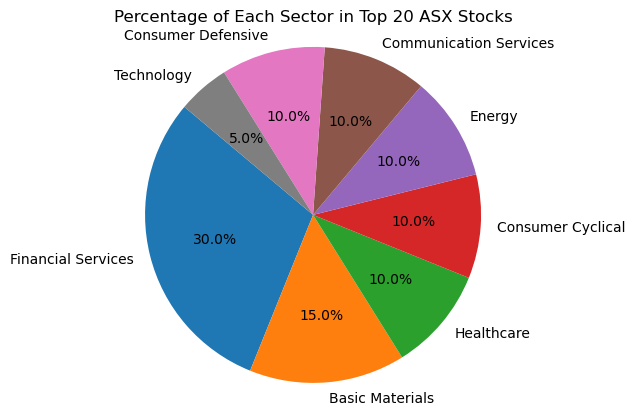

In [84]:
sector_counts = Top_20_ASX_Stock_df['Sector'].value_counts()
labels = sector_counts.index.tolist()
sizes = sector_counts.values.tolist()

# Plotting the pie chart
# plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Sector in Top 20 ASX Stocks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


percent_sector_image = os.path.join('ASX Stock Images', 'Percentage of Each Sector in Top 20 ASX Stocks.png')
plt.savefig(percent_sector_image)

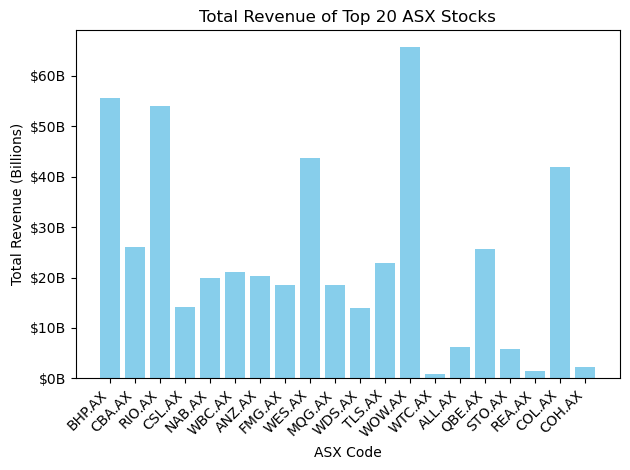

In [86]:
from matplotlib.ticker import FuncFormatter

# plt.figure(figsize=(12, 8))
plt.bar(Top_20_ASX_Stock_df['ASX Code'], Top_20_ASX_Stock_df['Total Revenue'], color='skyblue')

# Format y-axis labels as billions
formatter = FuncFormatter(lambda x, _: f'${int(x/1e9)}B')  # Divide by 1 billion and format as dollars with 2 decimal places
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('ASX Code')
plt.ylabel('Total Revenue (Billions)')
plt.title('Total Revenue of Top 20 ASX Stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.show()

top_revenue_image = os.path.join('ASX Stock Images', 'Total Revenue of Top 20 ASX Stocks.png')
plt.savefig(top_revenue_image)

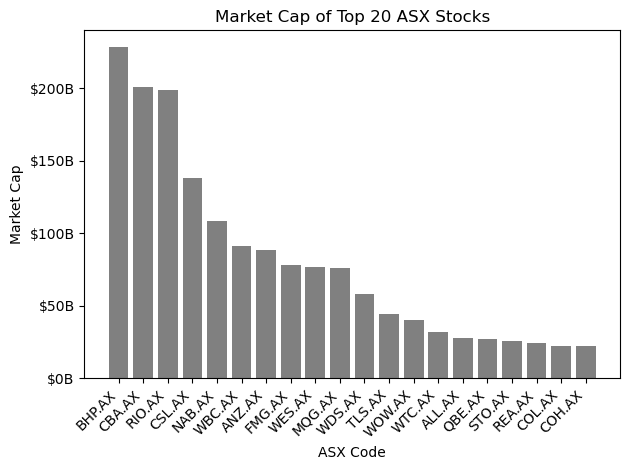

In [145]:
# plt.figure(figsize=(12, 8))
plt.bar(Top_20_ASX_Stock_df['ASX Code'], Top_20_ASX_Stock_df['Market Cap'], color='grey')

formatter = FuncFormatter(lambda x, _: f'${int(x/1e9)}B')  # Divide by 1 billion and format as dollars with 2 decimal places
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('ASX Code')
plt.ylabel('Market Cap (Billions)')
plt.title('Market Cap of Top 20 ASX Stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.show()

market_cap_image = os.path.join('ASX Stock Images', 'Market Cap of Top 20 ASX Stocks.png')
plt.savefig(market_cap_image)

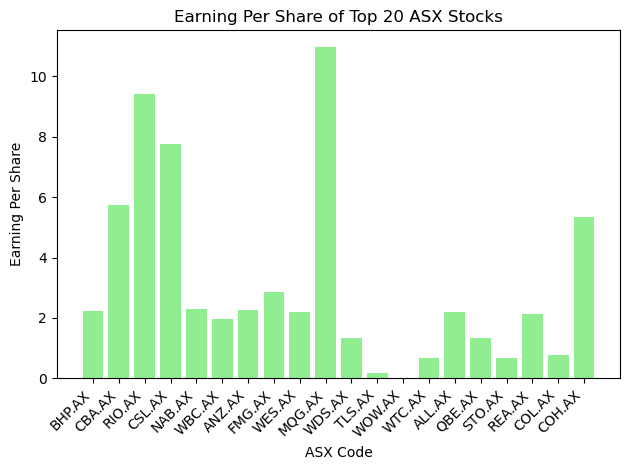

In [87]:
# plt.figure(figsize=(12, 8))
plt.bar(Top_20_ASX_Stock_df['ASX Code'], Top_20_ASX_Stock_df['Earning Per Share'], color='lightgreen')

plt.xlabel('ASX Code')
plt.ylabel('Earning Per Share')
plt.title('Earning Per Share of Top 20 ASX Stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.show()

eps_image = os.path.join('ASX Stock Images', 'Earning Per Share of Top 20 ASX Stocks.png')
plt.savefig(eps_image)

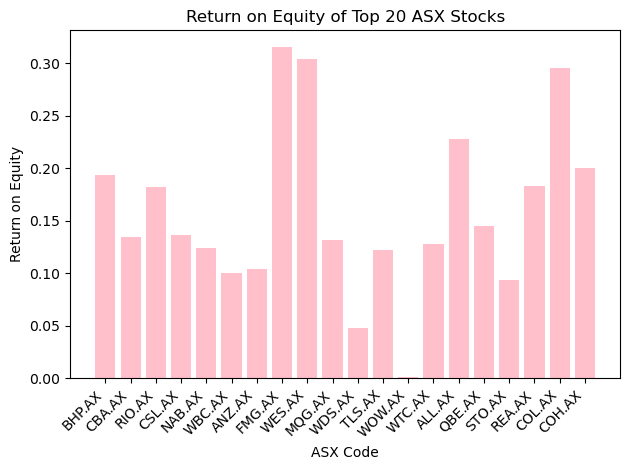

In [90]:
# plt.figure(figsize=(12, 8))
plt.bar(Top_20_ASX_Stock_df['ASX Code'], Top_20_ASX_Stock_df['Return On Equity'], color='pink')

plt.xlabel('ASX Code')
plt.ylabel('Return on Equity')
plt.title('Return on Equity of Top 20 ASX Stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.show()

roe_image = os.path.join('ASX Stock Images', 'Return on Equity of Top 20 ASX Stocks.png')
plt.savefig(roe_image)

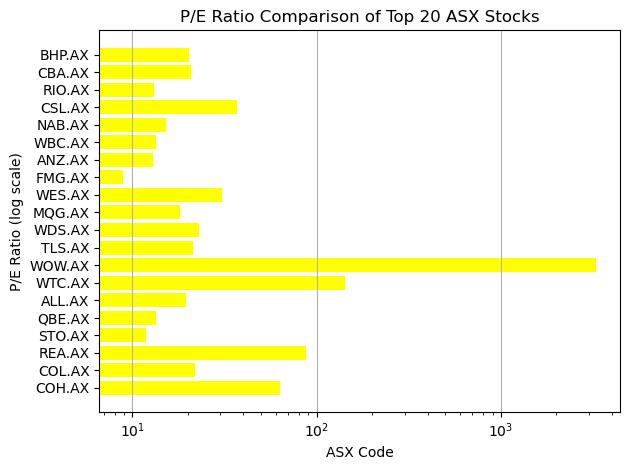

In [94]:
# plt.figure(figsize=(12, 8))
plt.barh(Top_20_ASX_Stock_df['ASX Code'], Top_20_ASX_Stock_df['P/E Ratio'], color='yellow')
plt.xscale('log')

plt.xlabel('ASX Code')
plt.ylabel('P/E Ratio (log scale)')
plt.title('P/E Ratio Comparison of Top 20 ASX Stocks')
plt.grid(axis='x')
plt.gca().invert_yaxis()

plt.tight_layout()
# plt.show()

pe_ratio_image = os.path.join('ASX Stock Images', 'PE Ratio Comparison of Top 20 ASX Stocks.png')
plt.savefig(pe_ratio_image)

In [126]:
Top_20_info_df = Top_20_ASX_Stock_df[['ASX Code', 'Name', 'Industry', 'Sector', 'Market Cap', 'Employee Number', 'Total Revenue', 'Price', 'Volume','P/E Ratio', 'Earning Per Share', 'Return On Equity']]
Top_20_info_df['Market Cap'] = Top_20_info_df['Market Cap'].apply(lambda x: f'{float(x):,.0f}')
Top_20_info_df['Total Revenue'] = Top_20_info_df['Total Revenue'].apply(lambda x: f'{float(x):,.0f}')
Top_20_info_df['Employee Number'] = Top_20_info_df['Employee Number'].apply(lambda x: f'{float(x):,.0f}')
Top_20_info_df['Volume'] = Top_20_info_df['Volume'].apply(lambda x: f'{float(x):,.0f}')
Top_20_info_df

C:\Users\royip\AppData\Local\Temp\ipykernel_20392\4048919215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_20_info_df['Market Cap'] = Top_20_info_df['Market Cap'].apply(lambda x: f'{float(x):,.0f}')
C:\Users\royip\AppData\Local\Temp\ipykernel_20392\4048919215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_20_info_df['Total Revenue'] = Top_20_info_df['Total Revenue'].apply(lambda x: f'{float(x):,.0f}')
C:\Users\royip\AppData\Local\Temp\ipykernel_20392\4048919215.py:4: SettingWithCopyWarnin

,ASX Code,Name,Industry,Sector,Market Cap,Employee Number,Total Revenue,Price,Volume,P/E Ratio,Earning Per Share,Return On Equity
0,BHP.AX,BHP Group Limited,Other Industrial Metals & Mining,Basic Materials,"228,556,832,768","49,089","55,656,001,536",45.13,"7,699,498",20.237669,2.23,0.19326
1,CBA.AX,Commonwealth Bank of Australia,Banks—Diversified,Financial Services,"200,903,524,352","48,930","26,127,998,976",120.07,"2,130,119",20.881739,5.75,0.13457
2,RIO.AX,Rio Tinto Group,Other Industrial Metals & Mining,Basic Materials,"198,921,879,552","57,000","54,041,001,984",122.59,"1,258,818",13.013800,9.42,0.18249
3,CSL.AX,CSL Limited,Biotechnology,Healthcare,"138,050,895,872","32,065","14,179,000,320",285.67,"702,007",36.765766,7.77,0.13627
4,NAB.AX,National Australia Bank Limited,Banks—Diversified,Financial Services,"108,666,953,728","38,516","19,832,000,512",34.82,"4,415,548",15.139131,2.30,0.12395
5,WBC.AX,Westpac Banking Corporation,Banks—Diversified,Financial Services,"91,485,003,776","33,664","20,996,999,168",26.11,"6,833,493",13.389744,1.95,0.10068
6,ANZ.AX,ANZ Group Holdings Limited,Banks—Diversified,Financial Services,"88,206,442,496","40,342","20,213,999,616",29.39,"4,935,678",12.947137,2.27,0.10445
7,FMG.AX,Fortescue Ltd,Other Industrial Metals & Mining,Basic Materials,"78,267,162,624","13,690","18,548,000,768",25.42,"5,821,228",8.888112,2.86,0.31545
8,WES.AX,Wesfarmers Limited,Home Improvement Retail,Consumer Cyclical,"76,824,608,768","120,000","43,664,998,400",67.70,"1,625,636",30.633482,2.21,0.30352
9,MQG.AX,Macquarie Group Limited,Capital Markets,Financial Services,"76,389,974,016","21,270","18,429,999,104",198.33,"615,923",18.062843,10.98,0.13202


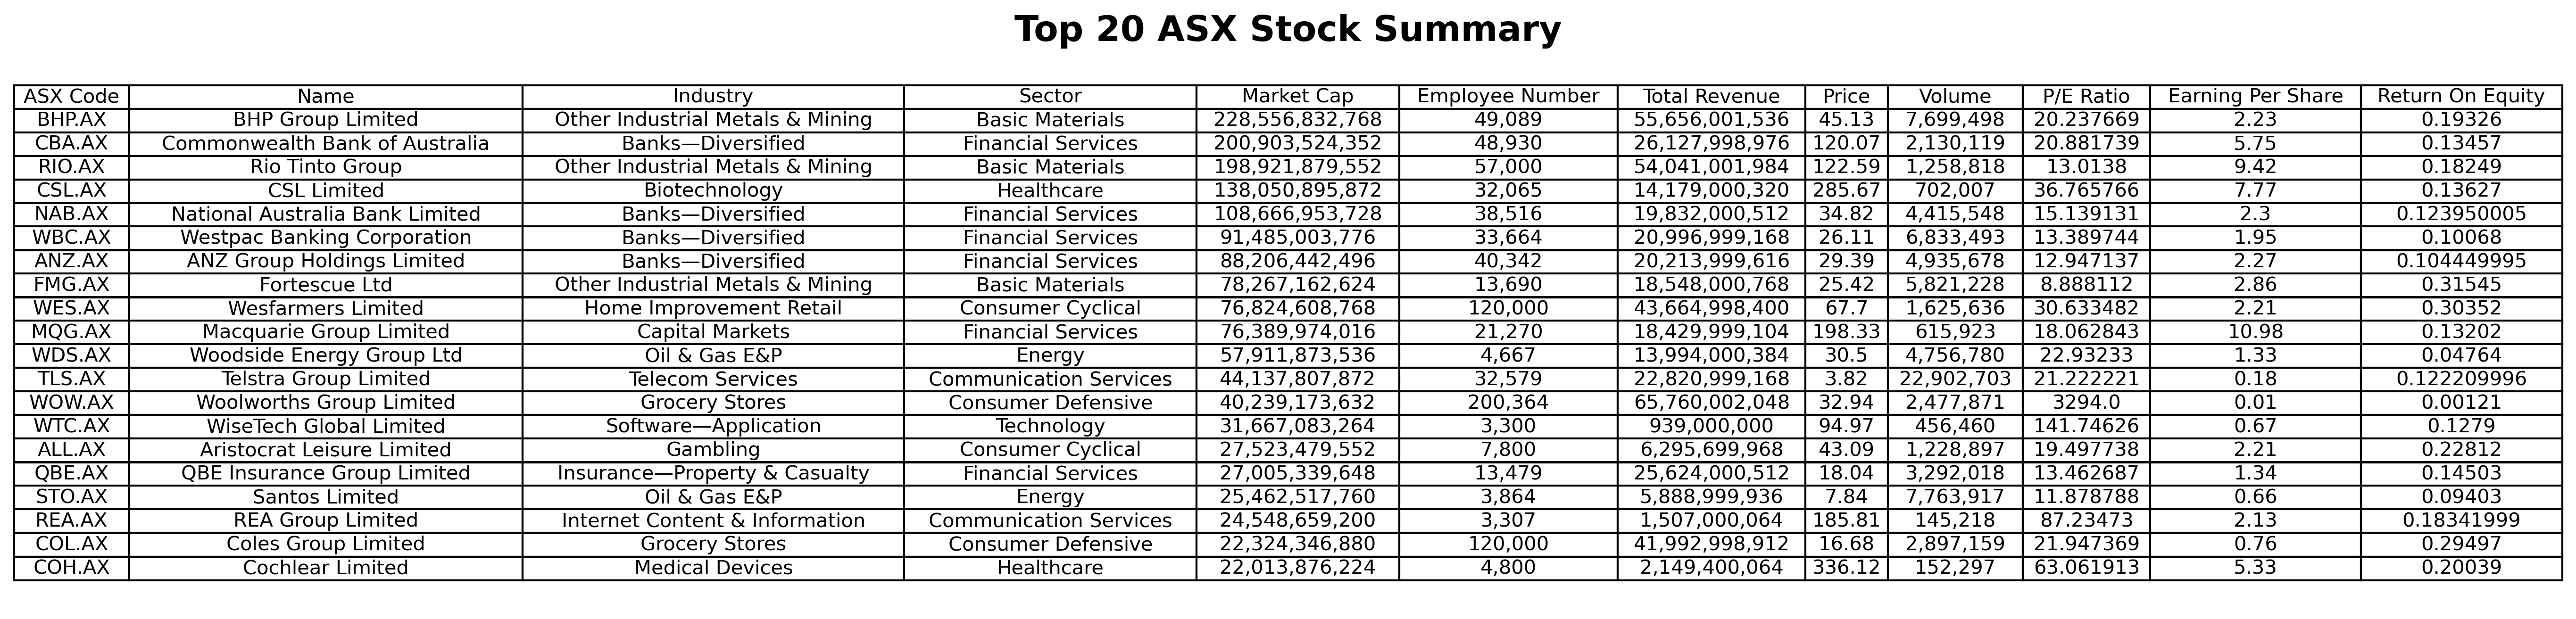

In [143]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
# fig.tight_layout(pad=0)

# Hide axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(cellText=Top_20_info_df.values,
                 colLabels=Top_20_info_df.columns,
                 loc='center',
                 cellLoc='center',
                 bbox=None)

# Adjust font size
table.auto_set_font_size(True)

table.auto_set_column_width([i for i in range(len(Top_20_info_df.columns))])

title_text = 'Top 20 ASX Stock Summary'
ax.set_title(title_text, fontsize=18, fontweight='bold', pad=10)

# Save the figure as an image
table_image = os.path.join('ASX Stock Images', 'Data Frame Table.png')
plt.savefig(table_image)


# plt.show()